# AI leads the way to computer vision

Most traditional methods of analysing and processing of images and video have been quickly surpassed by the power of artificial intelligence and deep learning. Convolutional Neural Networks, that work on the same basic principal as the neurons in the visual cortex, can analyse images and identify objects in them with staggering accuracy.

This is why for the solution to the problem of recognizing handwritten digits, CNNs are the best approach to use.

## Importing the libraries

First we need to import the basic libraries that we will use for preprocessing and visualization of the data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Loading the data

Next, we load the training and test datasets into separate variables using *Pandas*.

In [2]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the training dataset consists of one column for the label (which represents what digit was written), and 784 columns for each pixel of the image that contains the handwritten digit. To be able to use a 2D Convolutional Neural Network, we need to reshape the data so we can get the actual image of the digit.

In [3]:
train_data.shape

(42000, 785)

# Reshaping the data

The current shape of the training dataset given above tells us that there are 42000 images which are represented by 784 pixels (plus one column for the label). That means that in order to get a perfect square image, the dimensions of the pixel need to be ($\sqrt{784}, \sqrt{784}$), or (28, 28) pixels. 

## Separating the label column

In order to reshape the data, first we must separate the labels from the feature map.

In [4]:
train_labels = train_data['label']
train_data = train_data.drop('label', axis=1)

## Reshaping the datasets

As mentioned previously, the required shape of each image is 28x28 pixels, and we can easily achieve that using the *NumPy* function *reshape*.

In [5]:
train_data = train_data.values[:, :, np.newaxis].reshape(-1, 28, 28)
test_data = test_data.values[:, :, np.newaxis].reshape(-1, 28, 28)

train_data.shape

(42000, 28, 28)

We can observe that the training data now has a shape of (42000, 28, 28), which represents the 42000 images of handwritten digits, with dimensions 28x28.

# Visualization of the data

Before moving on, we can visualize the images of the digits to get a better understanding of how they look. This can be easily done using the *matplotlib* library.

We will plot 9 random images from the dataset that will be picked at random.

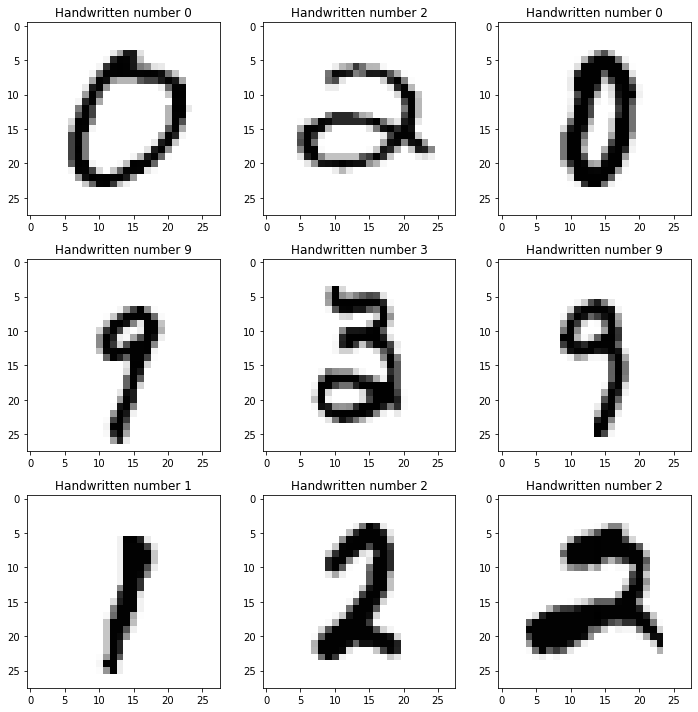

In [6]:
np.random.seed(157)

idxs = np.random.randint(0, train_data.shape[0], 9)

fig, ax = plt.subplots(3, 3, figsize=(10, 10))

ax[0, 0].imshow(train_data[idxs[0], :, :], cmap='Greys')
ax[0, 0].set_title('Handwritten number ' + str(train_labels[idxs[0]]))

ax[0, 1].imshow(train_data[idxs[1], :, :], cmap='Greys')
ax[0, 1].set_title('Handwritten number ' + str(train_labels[idxs[1]]))

ax[0, 2].imshow(train_data[idxs[2], :, :], cmap='Greys')
ax[0, 2].set_title('Handwritten number ' + str(train_labels[idxs[2]]))

ax[1, 0].imshow(train_data[idxs[3], :, :], cmap='Greys')
ax[1, 0].set_title('Handwritten number ' + str(train_labels[idxs[3]]))

ax[1, 1].imshow(train_data[idxs[4], :, :], cmap='Greys')
ax[1, 1].set_title('Handwritten number ' + str(train_labels[idxs[4]]))

ax[1, 2].imshow(train_data[idxs[5], :, :], cmap='Greys')
ax[1, 2].set_title('Handwritten number ' + str(train_labels[idxs[5]]))

ax[2, 0].imshow(train_data[idxs[6], :, :], cmap='Greys')
ax[2, 0].set_title('Handwritten number ' + str(train_labels[idxs[6]]))

ax[2, 1].imshow(train_data[idxs[7], :, :], cmap='Greys')
ax[2, 1].set_title('Handwritten number ' + str(train_labels[idxs[7]]))

ax[2, 2].imshow(train_data[idxs[8], :, :], cmap='Greys')
ax[2, 2].set_title('Handwritten number ' + str(train_labels[idxs[8]]))

plt.tight_layout()

As we can see, some of these numbers are written with very poor handwritting that can even confuse a human, meaning the CNN will have quite a difficult task to acomplish.

# Classification

## Preparing the data for classification

There are a couple of preprocessing steps we need to complete before the training of the model:

* First, the training labels need to be one-hot encoded so we can use a softmax output layer at the end of the network.
* Next, we need to normalize the values of the data between 0 and 1, which leads to an improvement of the results of the classification.
* We also need to reshape the data again by adding a new fourth axis which represents the color channel of the image.
* Finally, we need to create a new dataset which will be used for validation during the training phase of the network.

### One-hot encoding the labels

One-hot encodin the labels so we can use the *softmax* output layer with the *categorical crossentropy* loss function.

In [7]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
train_labels = encoder.fit_transform(train_labels)

### Normalization

Scaling the values of the pixels of the images in range between 0 and 1.

In [8]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

### Reshaping the data

2D convolutional neural networks require the images to be 3D, where one of the dimensions represents the colour channel. Seeing as our images are black and white, we simply add an empty new axis at the end of the data.

In [9]:
train_data = train_data[:, :, :, np.newaxis]
test_data = test_data[:, :, :, np.newaxis]

### Creating the validation dataset

During the training, the network requires a validation dataset to be able to calculate its performace. We can create this dataset by setting aside 10% of the training data to be used as validation, using the *train_test_split* function from the *sklearn* library.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.1, random_state=157, stratify=train_labels)

## Data Augmentation

Before training, a good practice to use (especially when working with image data) is to perform data augmentation. This can be easily done using the *ImageDataGenerator* function from the *Keras* library.

We augment the images in the training set by performing certain transformations upon them, such as:

* Rotating by 10 degrees
* Zooming by 10%
* Horizontal and vertical shift of the image by 10%

Flipping and whitening of the images is not performed due to the possibilty of hurting the final results rather than aiding them.

In [11]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        horizontal_flip=False,
        vertical_flip=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1
        )


data_generator.fit(X_train)

## Building the Keras CNN model

In [12]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Activation, Dropout, Dense, MaxPooling2D, Conv2D, Flatten
from keras.initializers import he_uniform, glorot_uniform
from keras.activations import relu
from keras.constraints import maxnorm

init_relu = he_uniform(seed=157)        # used for ReLU
init_tanh = glorot_uniform(seed=157)    # used for tanh and softmax

model = Sequential()

# input and first Convolutional layer
model.add(Conv2D(name='Conv_1', input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), padding='same', kernel_initializer=init_relu, kernel_constraint=maxnorm(3)))
model.add(BatchNormalization())
model.add(Activation(relu))


# second Convolutional layer and first MaxPooling layer
model.add(Conv2D(name='Conv_2', filters=64, kernel_size=(3, 3), padding='same', kernel_initializer=init_relu, kernel_constraint=maxnorm(3)))
model.add(BatchNormalization())
model.add(Activation(relu))
model.add(MaxPooling2D(name='Pooling_1', pool_size=(2, 2), strides=2))
model.add(Dropout(0.20))


# fourth Convolutional layer
model.add(Conv2D(name='Conv_4', filters=32, kernel_size=(3, 3), padding='same', kernel_initializer=init_relu, kernel_constraint=maxnorm(3)))
model.add(BatchNormalization())
model.add(Activation(relu))


# fifth Convolutional layer and second MaxPooling layer
model.add(Conv2D(name='Conv_5', filters=32, kernel_size=(3, 3), padding='same', kernel_initializer=init_relu, kernel_constraint=maxnorm(3)))
model.add(BatchNormalization())
model.add(Activation(relu))
model.add(MaxPooling2D(name='Pooling_2', pool_size=(2, 2), strides=2))
model.add(Dropout(0.20))


# first Dense layer
model.add(Flatten())
model.add(Dense(name='FC_1', units=512, kernel_initializer=init_relu, kernel_constraint=maxnorm(3)))
model.add(BatchNormalization())
model.add(Activation(relu))
model.add(Dropout(0.20))

# second Dense layer
model.add(Dense(name='FC_2', units=128, kernel_initializer=init_relu, kernel_constraint=maxnorm(3)))
model.add(BatchNormalization())
model.add(Activation(relu))

# softmax output Dense layer
model.add(Dense(name='output', units=10, activation='softmax', kernel_initializer=init_tanh, kernel_constraint=maxnorm(3)))

## Setting all random variables to a single seed for reproducibility

In [13]:
import os
import random
import tensorflow as tf

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['PYTHONHASHSEED'] = str(157)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(157)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(157)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.compat.v1.set_random_seed(157)

# 5. Configure a new global `tensorflow` session
from tensorflow.python.keras import backend as k

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                                        inter_op_parallelism_threads=1)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
k.set_session(sess)

## Training the network

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, LearningRateScheduler
from keras.optimizers import Adam
from keras.models import save_model


lr = 0.001

opt = Adam(learning_rate=lr, amsgrad=True)

model.compile(optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

checkpoint = ModelCheckpoint('neural_network_checkpoint_training.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
lr_decay = LearningRateScheduler(lambda x: lr * 0.95 ** x)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

model.fit_generator(data_generator.flow(X_train, y_train, batch_size=64),
        epochs=50,
        validation_data=(X_val, y_val),
        shuffle=True,
        callbacks=[tensorboard, checkpoint, lr_decay],
        verbose=1)

save_model(checkpoint.model, 'neural_network_latest_saved.h5')

Epoch 1/50
590/591 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.9189
Epoch 00001: val_loss improved from inf to 0.08681, saving model to neural_network_checkpoint_training.h5
591/591 [==============================] - 16s 27ms/step - loss: 0.2684 - accuracy: 0.9190 - val_loss: 0.0868 - val_accuracy: 0.9729
Epoch 2/50
590/591 [============================>.] - ETA: 0s - loss: 0.0929 - accuracy: 0.9723
Epoch 00002: val_loss improved from 0.08681 to 0.05786, saving model to neural_network_checkpoint_training.h5
591/591 [==============================] - 16s 28ms/step - loss: 0.0931 - accuracy: 0.9722 - val_loss: 0.0579 - val_accuracy: 0.9817
Epoch 3/50
591/591 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9789
Epoch 00003: val_loss improved from 0.05786 to 0.03251, saving model to neural_network_checkpoint_training.h5
591/591 [==============================] - 15s 26ms/step - loss: 0.0699 - accuracy: 0.9789 - val_loss: 0.0325 - val_accu

## The final prediction and submission

In [15]:
from keras.models import load_model

clf = load_model('neural_network_checkpoint_training.h5')

prediction = clf.predict(test_data)

prediction = pd.DataFrame(np.argmax(prediction, axis=-1), columns=['Label'])
img_idx = pd.DataFrame(np.arange(1, len(prediction) + 1), columns=['ImageId'])

prediction = pd.concat([img_idx, prediction], axis=1)

prediction.to_csv('submission_cnn.csv', index=False)

# Conclusion

With sufficient data augmentation and tuning of the architecture and hyperparameters of the Convolutional Neural Network, we achieve a significant accuracy of ~99.6%, which more than acceptable for the task at hand. This further proves the point that artificial intelligence is the best new approach to the problem of computer vision, that will only continue to get better and better.